In [16]:
from __future__ import print_function

import keras
from keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


In [17]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [18]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [19]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


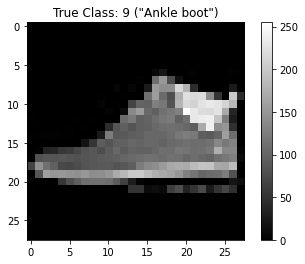

In [20]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

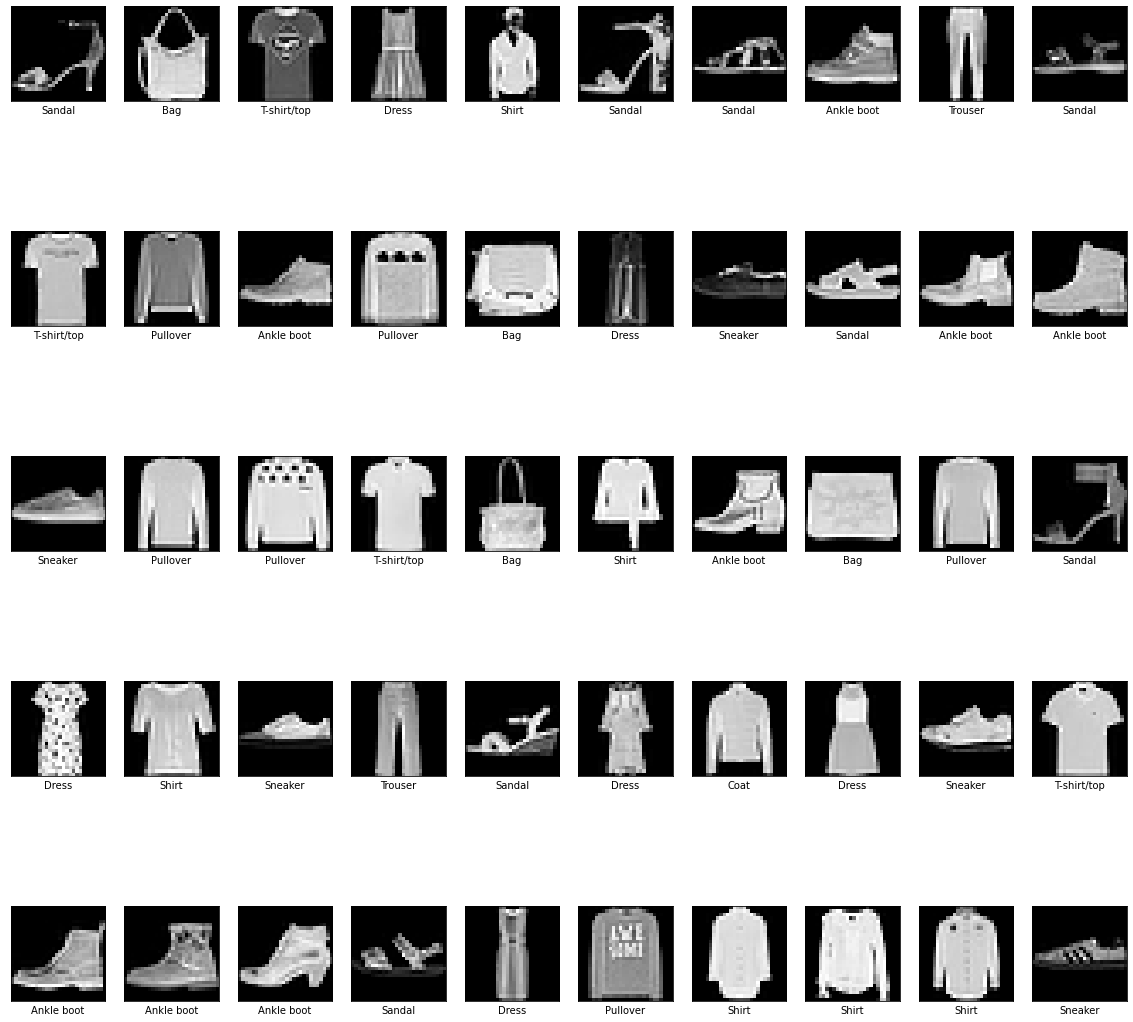

In [21]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

In [22]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(
    validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

In [23]:
# Normalize

train_images_model = train_images_flatten / 255.
validation_images_model = validation_images_flatten / 255.
test_images_model = test_images_flatten / 255.

In [24]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.np_utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.np_utils.to_categorical(
    validation_labels, 10)
test_labels_categ = keras.utils.np_utils.to_categorical(test_labels, 10)

In [25]:
batch_size = 128
num_classes = 10
epochs = 40

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model,
                    train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model,
                                     validation_labels_categ))

Epoch 1/40
391/391 [==============================] - 7s 16ms/step - loss: 0.5817 - accuracy: 0.7893 - val_loss: 0.4430 - val_accuracy: 0.8431
Epoch 2/40
391/391 [==============================] - 5s 14ms/step - loss: 0.4087 - accuracy: 0.8495 - val_loss: 0.3913 - val_accuracy: 0.8553
Epoch 3/40
391/391 [==============================] - 4s 9ms/step - loss: 0.3661 - accuracy: 0.8647 - val_loss: 0.3735 - val_accuracy: 0.8650
Epoch 4/40
391/391 [==============================] - 4s 9ms/step - loss: 0.3440 - accuracy: 0.8727 - val_loss: 0.4695 - val_accuracy: 0.8323
Epoch 5/40
391/391 [==============================] - 4s 9ms/step - loss: 0.3256 - accuracy: 0.8799 - val_loss: 0.3431 - val_accuracy: 0.8776
Epoch 6/40
391/391 [==============================] - 4s 9ms/step - loss: 0.3098 - accuracy: 0.8846 - val_loss: 0.3254 - val_accuracy: 0.8816
Epoch 7/40
391/391 [==============================] - 4s 9ms/step - loss: 0.2992 - accuracy: 0.8886 - val_loss: 0.3387 - val_accuracy: 0.8773
Epoc

In [27]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.885699987411499


In [28]:
test_logits = model.predict(test_images_flatten)
test_logits

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [29]:
test_predictions = np.argmax(test_logits, axis=1)
test_predictions


array([9, 2, 1, ..., 8, 1, 5])

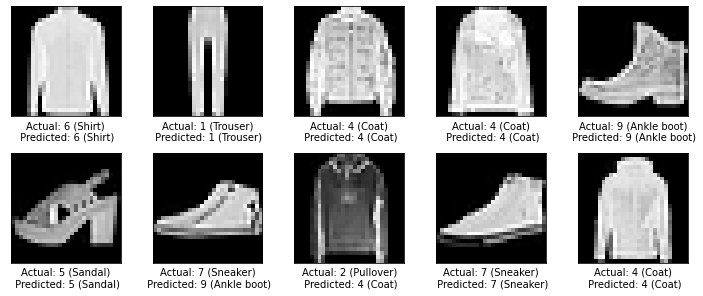

In [30]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 1000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    actual_label  = np.argmax(test_labels_categ[img_index])
    predicted_label = np.argmax(test_logits[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()

In [31]:
True_labels, predicted_labels = [], []
for i in range(len(test_labels)):
    True_labels.append(text_labels[test_labels[i]])
    predicted_labels.append(text_labels[test_predictions[i]])

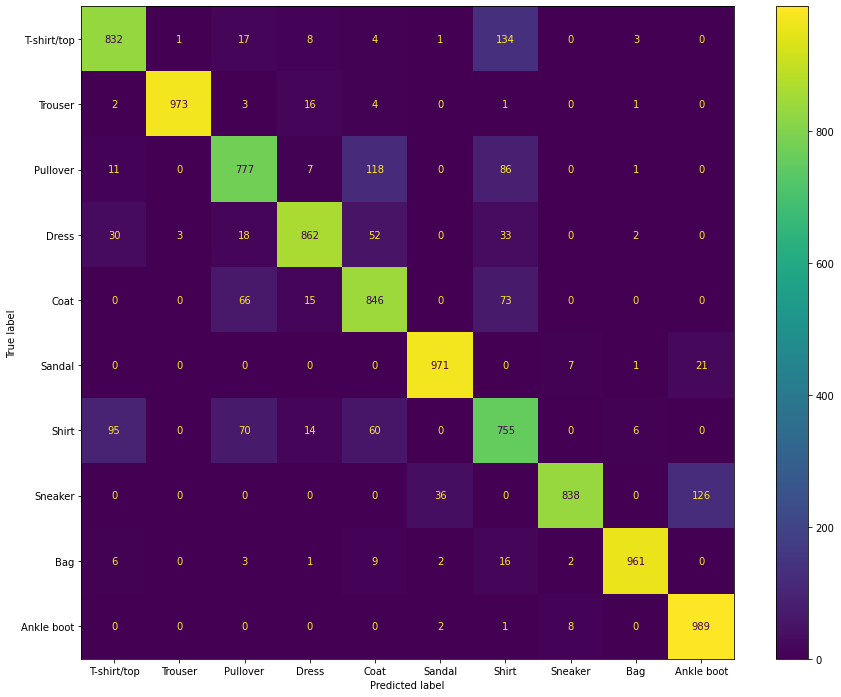

In [32]:
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
def conf_matrix(y_test, y_pred, model, classes):
    cm = confusion_matrix(y_test, y_pred, labels=text_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_labels)
    fig, ax = plt.subplots(figsize=(15,12))
    disp.plot(ax=ax)
    plt.show()
conf_matrix(True_labels, predicted_labels, model, text_labels)